In [57]:
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import soundfile as sf
import joblib
import pandas as pd

In [58]:

# Load the audio file
audio, sample_rate = librosa.load('Mayor Scale - C.wav')
ipd.Audio(data = audio, rate = sample_rate)


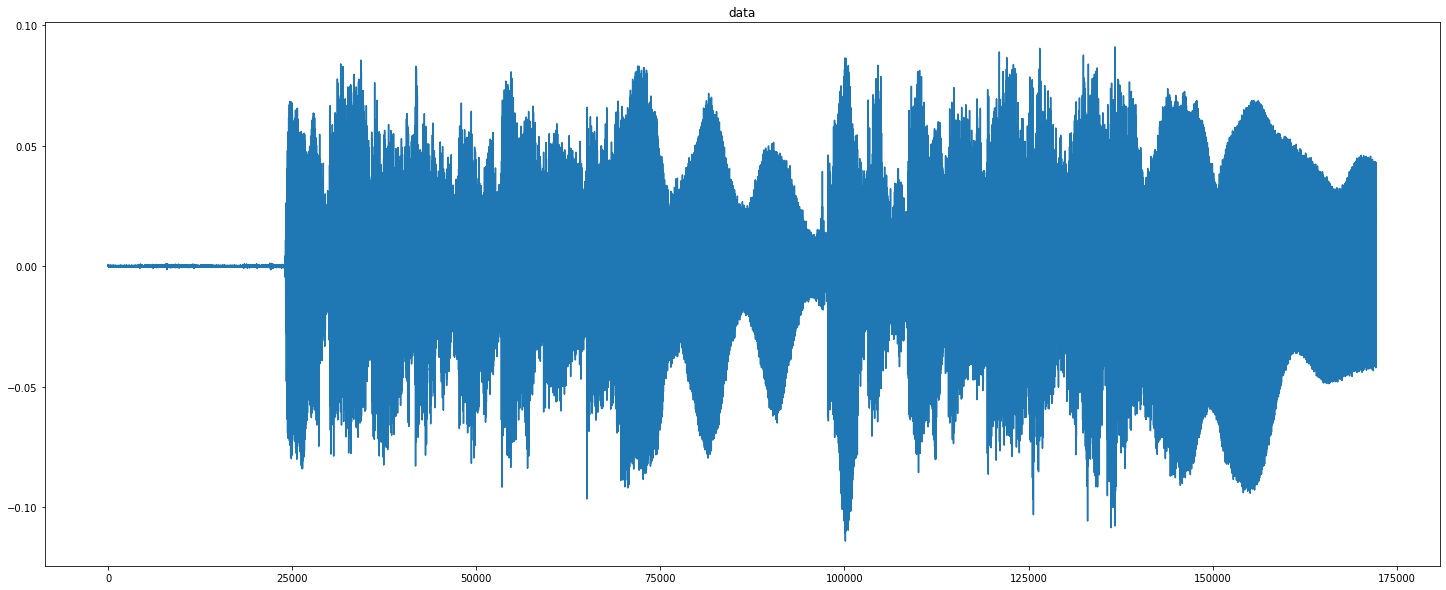

In [59]:
def show_signal(signal):
    

    plt.figure(figsize=(25,10))
    plt.title("data")
    plt.plot(signal)
    plt.show()

show_signal(audio)

In [60]:
audio, _ = librosa.effects.trim(audio, top_db=4)
ipd.Audio(data = audio, rate = sample_rate)

In [61]:
# Detect onsets
onsets = librosa.onset.onset_detect(audio, sr=sample_rate)

# Convert onsets to time in seconds
onset_times = librosa.frames_to_time(onsets, sr=sample_rate)

C:\Users\hp\AppData\Local\Temp/ipykernel_9708/2078932817.py:2: FutureWarning: Pass y=[ 0.00014596 -0.00948642 -0.01545381 ...  0.04629672  0.04428138
  0.04215941] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onsets = librosa.onset.onset_detect(audio, sr=sample_rate)


In [62]:
splits = []
for i, onset_time in enumerate(onset_times):
    if i == 0:
        # Split from the beginning of the audio
        splits.append(audio[:int(sample_rate * onset_time)])
    elif i == len(onset_times) - 1:
        # Split from the previous onset to the end of the audio
        splits.append(audio[int(sample_rate * onset_times[i-1]):])
    else:
        # Split from the previous onset to the current onset
        splits.append(audio[int(sample_rate * onset_times[i-1]):int(sample_rate * onset_time)])



In [79]:
def pitch(signal):
  fft = librosa.stft(signal, center = False, n_fft=1024)
  energi = abs(fft)**2
  data = pd.DataFrame(energi[:70])
  index = data.max().idxmax()
  formatted_data = map(lambda x: format(x, '.2f'), data[index])
  data =  list(formatted_data)
  return data

In [81]:
datas = []

In [82]:
for i, split in enumerate(splits):
  datas.append(pitch(split))
  # sf.write(f'split/split_{i}.wav', split, sample_rate)

In [64]:
model = joblib.load('model.pkl')

In [88]:
model.predict(datas)

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['C', 'C', 'E2', 'D', 'E2', 'E2', 'E2', 'E2', 'E2', 'G2', 'A2',
       'E2', 'C1', 'C1', 'E2', 'A2', 'A2', 'G2', 'E2', 'F1', 'E2', 'C1'],
      dtype=object)